In [10]:
# import packages
import numpy as np
from scipy.integrate import odeint # ode solver
import matplotlib.pyplot as plt

In [15]:
h = 3 # convective heat transfer coefficient [W/m^2K]
A = 10 # wall surface area [m^2]
k = 1.9 # thermal conductivity [W/mK]
l = 0.3 # wall thickness [m]
cp = 840 # specific heat [J/kgK]
rho = 2300 # density [kg/m^3]
C = cp*rho*A*l # thermal capacity

coff1 = h*A 
coff2 = (k*A) / (l/2)

def cal_Ti(Tindoor,T1):
    return ########## add a function ##########

def cal_Te(Toutdoor,T1):
    return ########## add a function ##########

def func_Toutdoor(t): # outdoor air temperature follows a sin function 
    return np.sin((t-3600*12)/(60*60*24)*(2*np.pi))*3+25

def dTdt(x, t): # the rate of T1 temperature change
    Tindoor = 20 # fixed indoor air temperature
    Toutdoor = func_Toutdoor(t) # outdoor air temperature
    T1 = x[0] # initial temperature of T1
    Ti = cal_Ti(Tindoor,T1) # Ti temperature
    Te = cal_Te(Toutdoor,T1) # Te temperature
    dT1dt = ########## add a function ##########
    return [dT1dt]

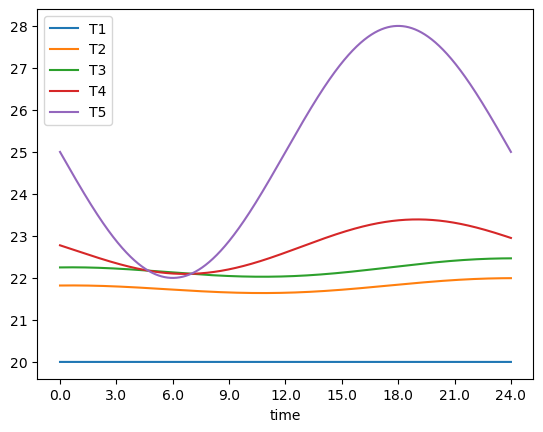

In [16]:
# simulation time
t_span = np.linspace(0, (60*60*24)*1, (60*60*24)+1) 

# Initial T3 temperature
T1_0 = 22.25

# run simulation using ode solver
solution = odeint(dTdt, [T1_0], t_span)

Tindoor = np.ones_like(t_span)*20
Toutdoor = func_Toutdoor(t_span)
T1 = solution[:, 0]
Ti = cal_Ti(Tindoor,T1)
Te = cal_Te(Toutdoor,T1)

# plot
plt.plot(t_span, Tindoor, label='Tindoor')
plt.plot(t_span, Ti, label='Ti')
plt.plot(t_span, T1, label='T1')
plt.plot(t_span, Te, label='Te')
plt.plot(t_span, Toutdoor, label='Toutdoor')
plt.legend();
plt.xticks(t_span[::60*60*3],t_span[::60*60*3]/3600)
plt.xlabel('time'); 